# 가우시안 정규 분포

**가우시안 정규 분포(Gaussian normal distribution)**, 혹은 간단히 정규 분포(normal distribution)는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 가장 많이 사용되는 확률 모형이다.

정규 분포는 평균 $\mu$와 분산 $\sigma^2$ 이라는 두 개의 모수만으로 정의되며 확률 밀도 함수는 다음과 같은 수식으로 표현된다.

 $$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

정규 분포 중에서도 평균이 0 이고 분산이 1 인 ($\mu=0$, $\sigma^2=1$) 정규 분포를 **표준 정규 분포(standard normal distribution)**라고 한다.

## SciPy를 사용한 정규 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 norm 클래스는 정규 분포에 대한 클래스이다. `loc` 인수로 평균을 설정하고 `scale` 인수로 표준 편차를 설정한다.

In [1]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

`pdf` 메서드를 사용하면 확률 밀도 함수(pdf: probability density function)를 계산할 수 있다.

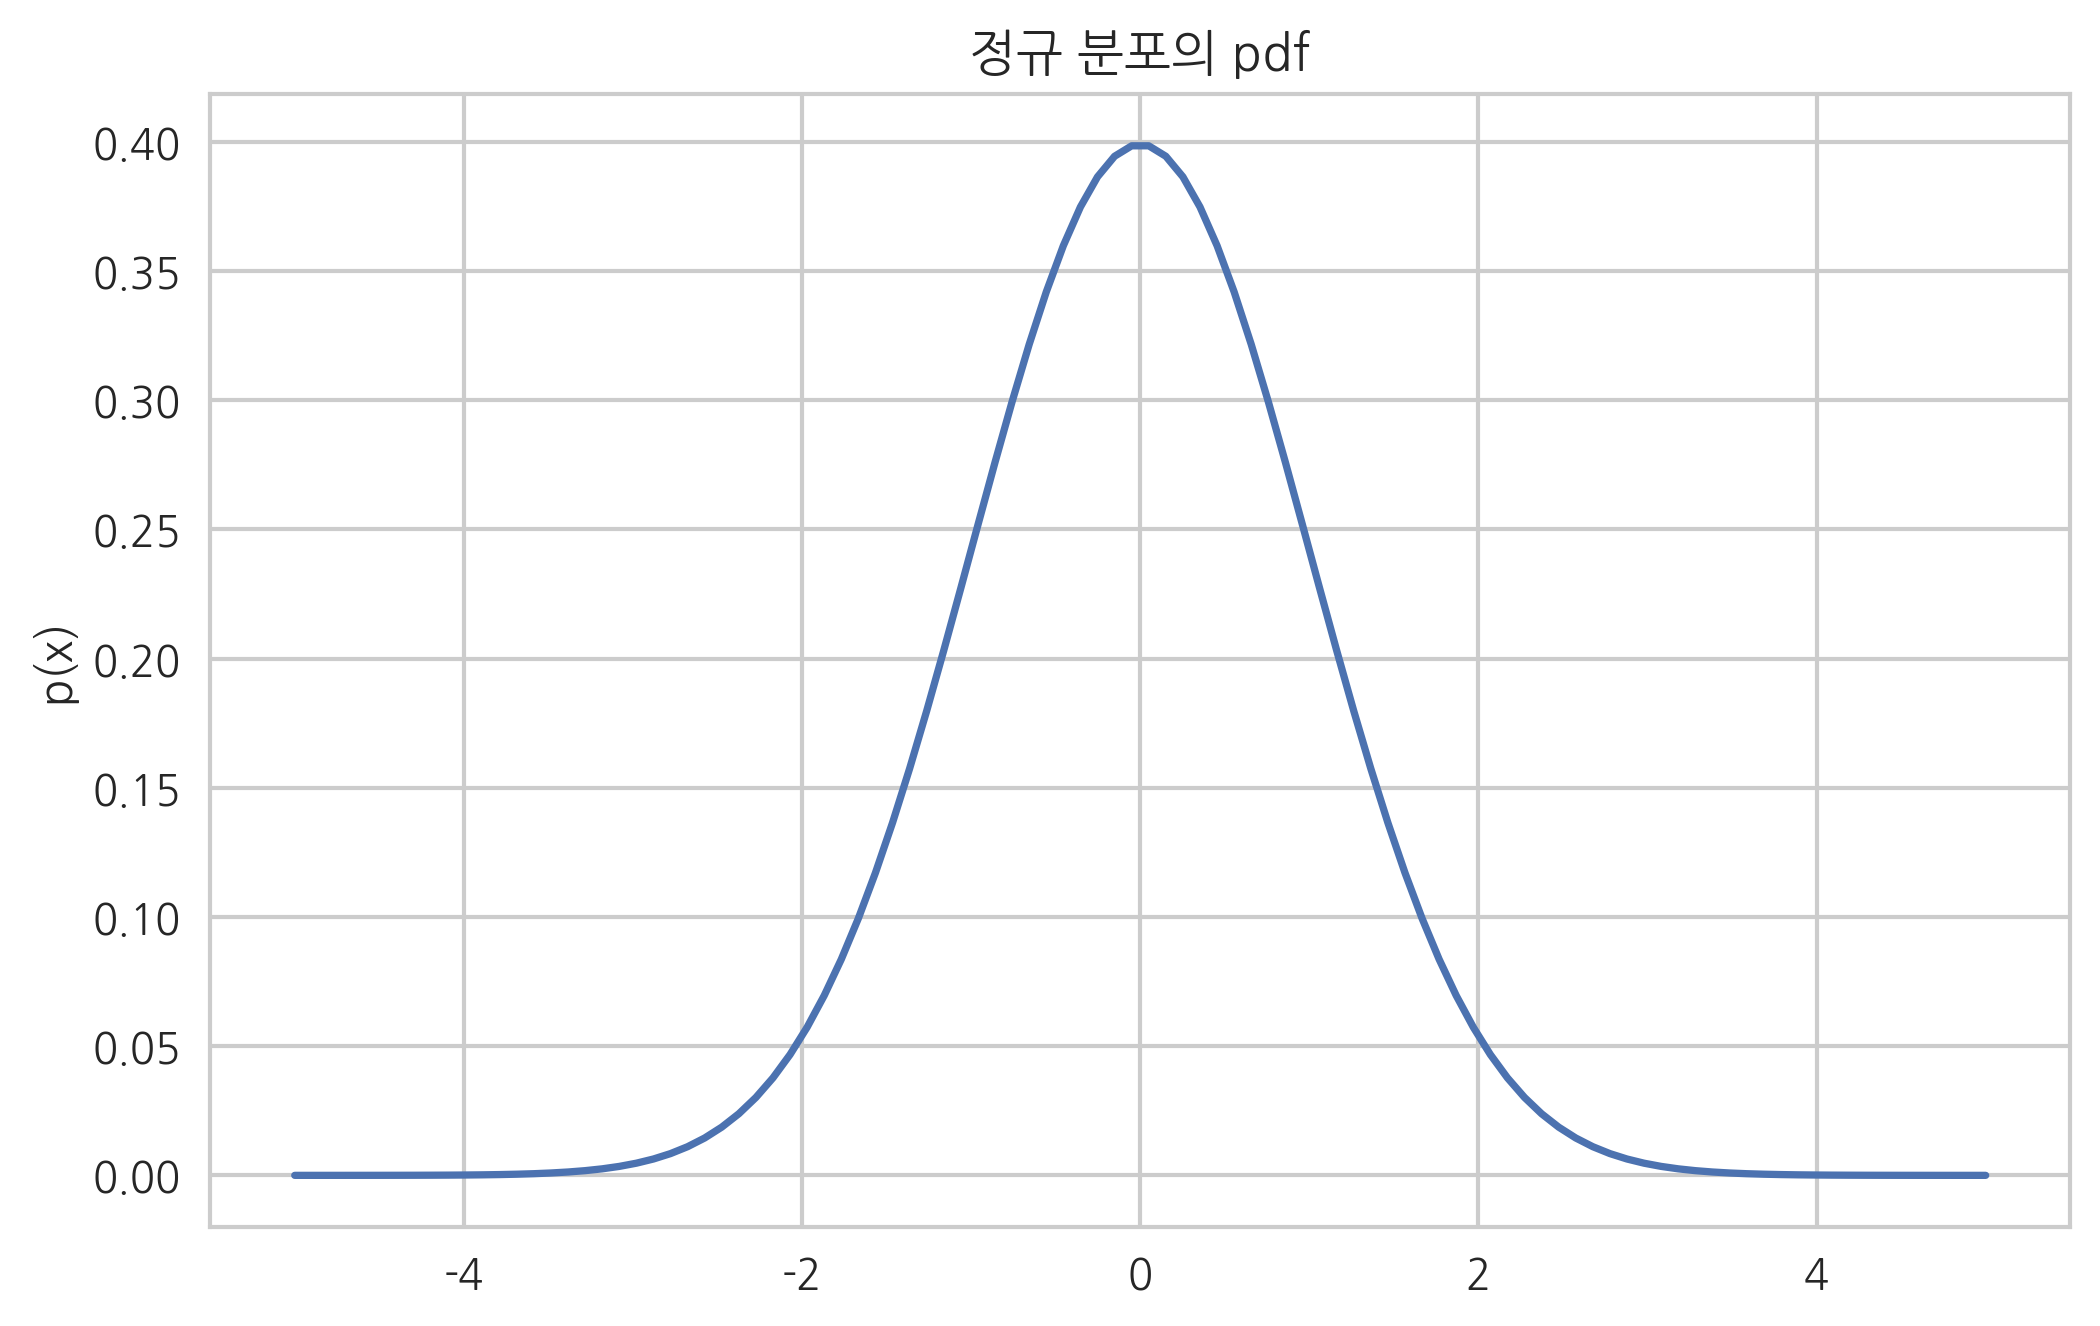

In [2]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("정규 분포의 pdf")
plt.show()

시뮬레이션을 통해 샘플을 얻으려면 rvs 메서드를 사용한다.

In [3]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

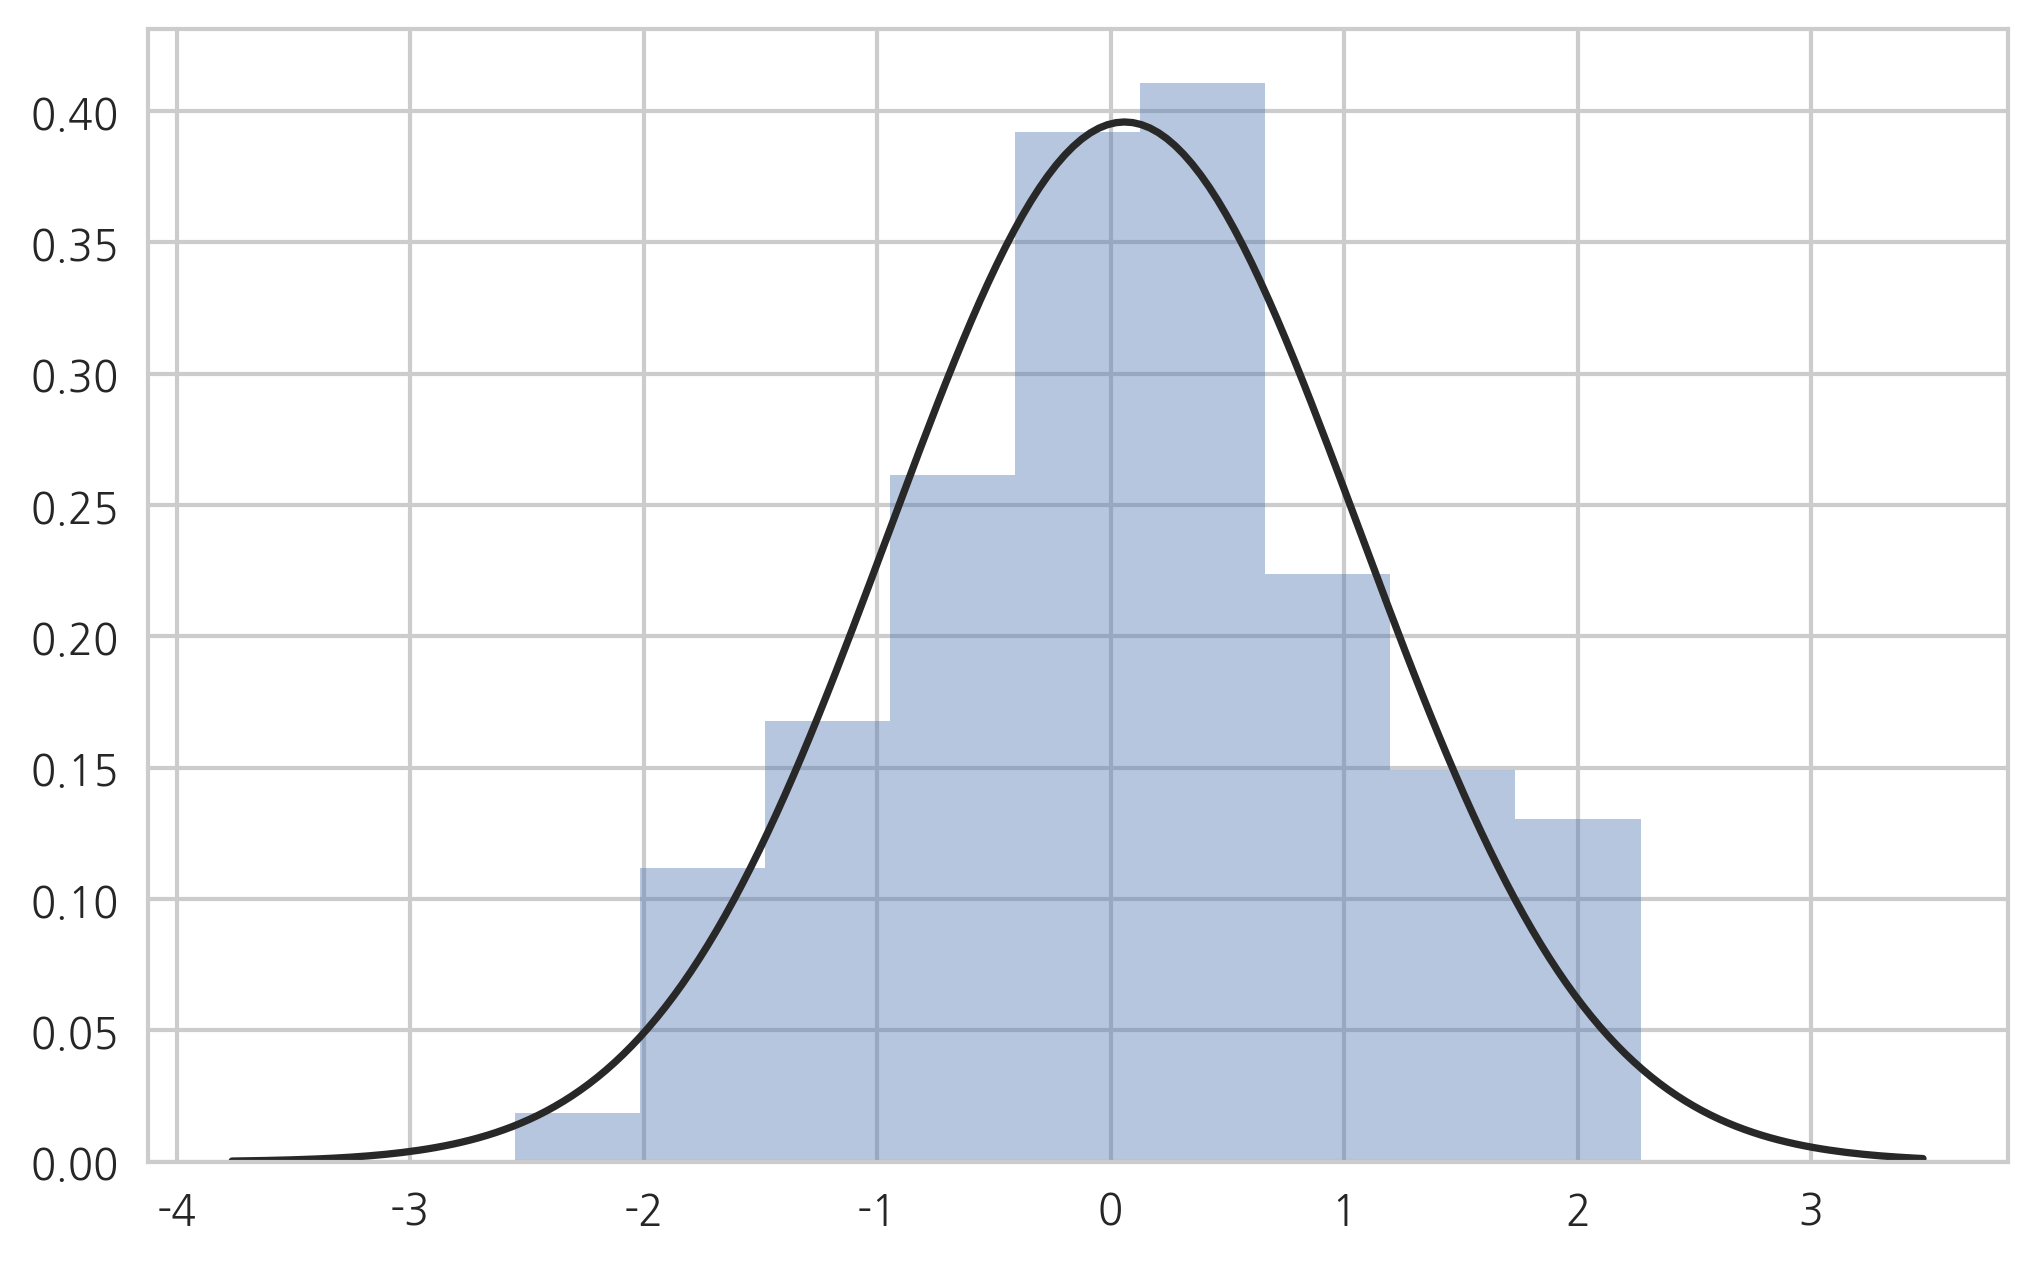

In [5]:
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

## Q-Q 플롯

정규 분포는 여러가지 연속 확률 분포 중에서도 가장 유용한 특성을 지니며 널리 사용되는 확률 분포이다. 따라서 어떤 확률 변수의 분포가 정규 분포인지 아닌지 확인하는 것은 정규 분포 검정(normality test)은 가장 중요한 통계적 분석 중의 하나이다. 그러나 구체적인 정규 분포 검정을 사용하기에 앞서 시작적으로 간단하게 정규 분포를 확인하는 Q-Q 플롯을 사용할 수 있다.

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플 데이터의 분포와 정규 분포의 분포 형태를 비교하는 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다. 

1. 대상 샘플 데이터를 크기에 따라 정렬(sort)한다. 
2. 각 샘플 데이터의 분위함수(quantile function) 값을 구한다. 
3. 각 샘플 데이터의 분위함수 값이 정규 분포의 누적확률함수(cdf) 값이 되는 정규 분포의 값을 구한다.
4. 샘플 데이터와 그에 대응하는 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 비슷한 플롯을 완성한다.

SciPy 패키지의 stats 서브 패키지는 Q-Q 플롯을 계산하고 그리기 위한 `probplot` 명령을 제공한다. 

* http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

`probplot`은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 `plot` 인수에 matplotlib.pylab 모듈 객체 혹은 `Axes` 클래스 객체를 넘겨주어야 한다.

정규 분포를 따르는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.

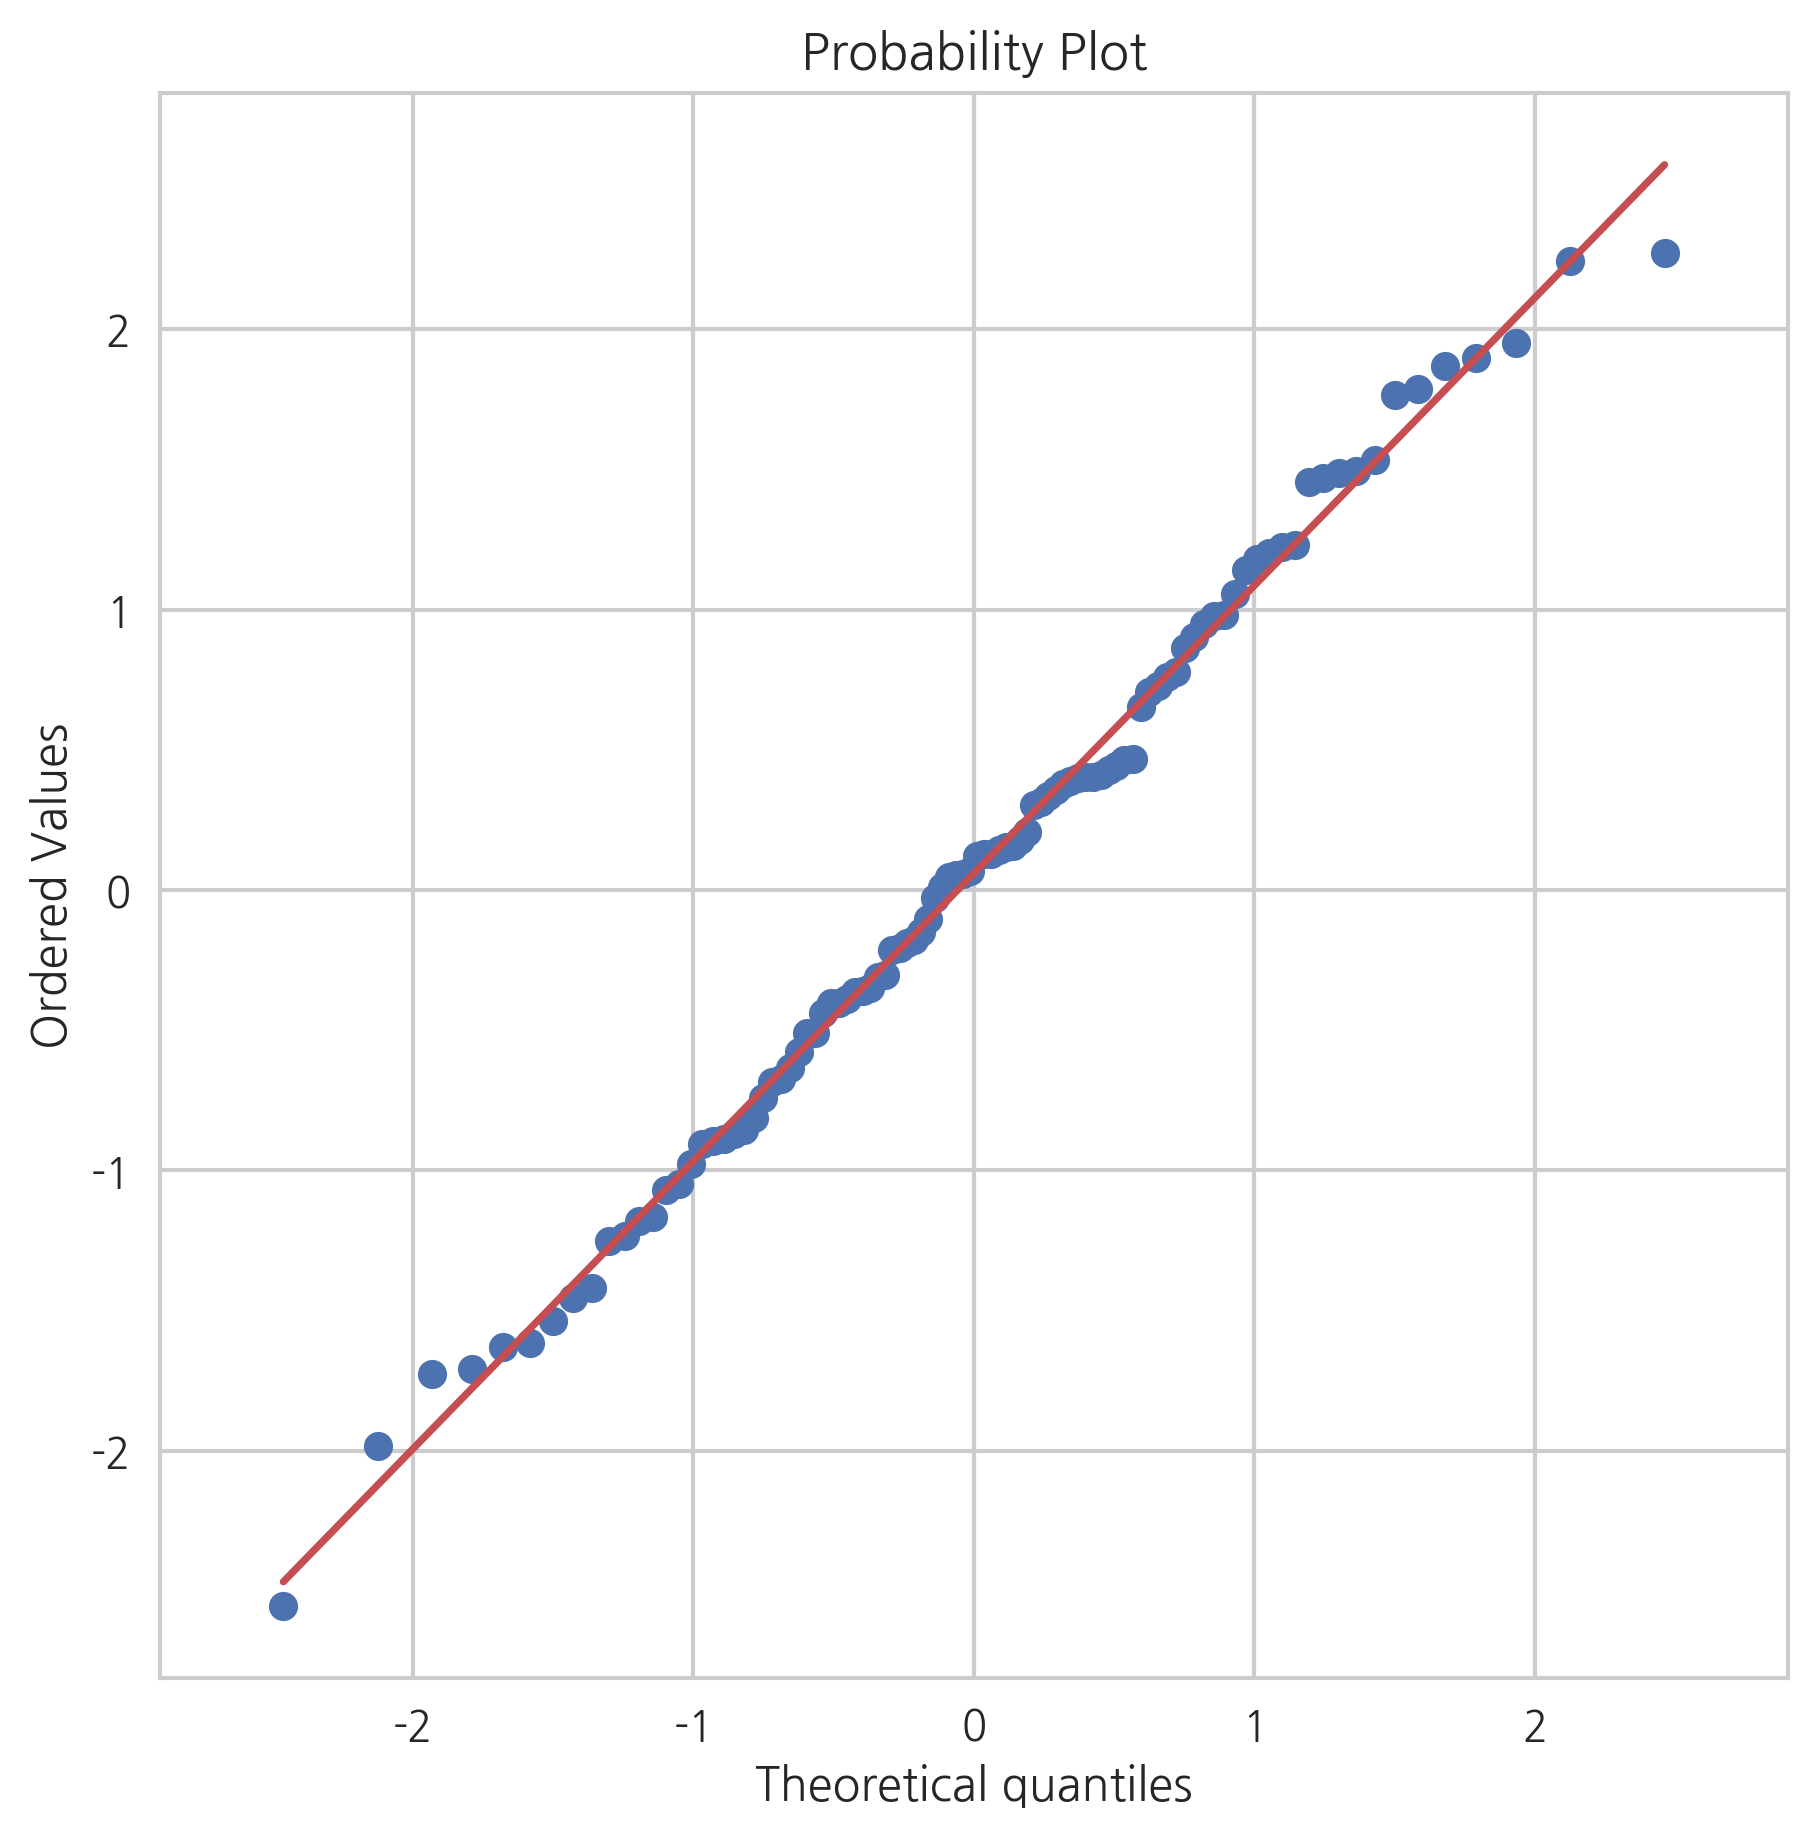

In [6]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

정규 분포를 따르지 않는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선이 아닌 휘어진 형태로 나타난다.

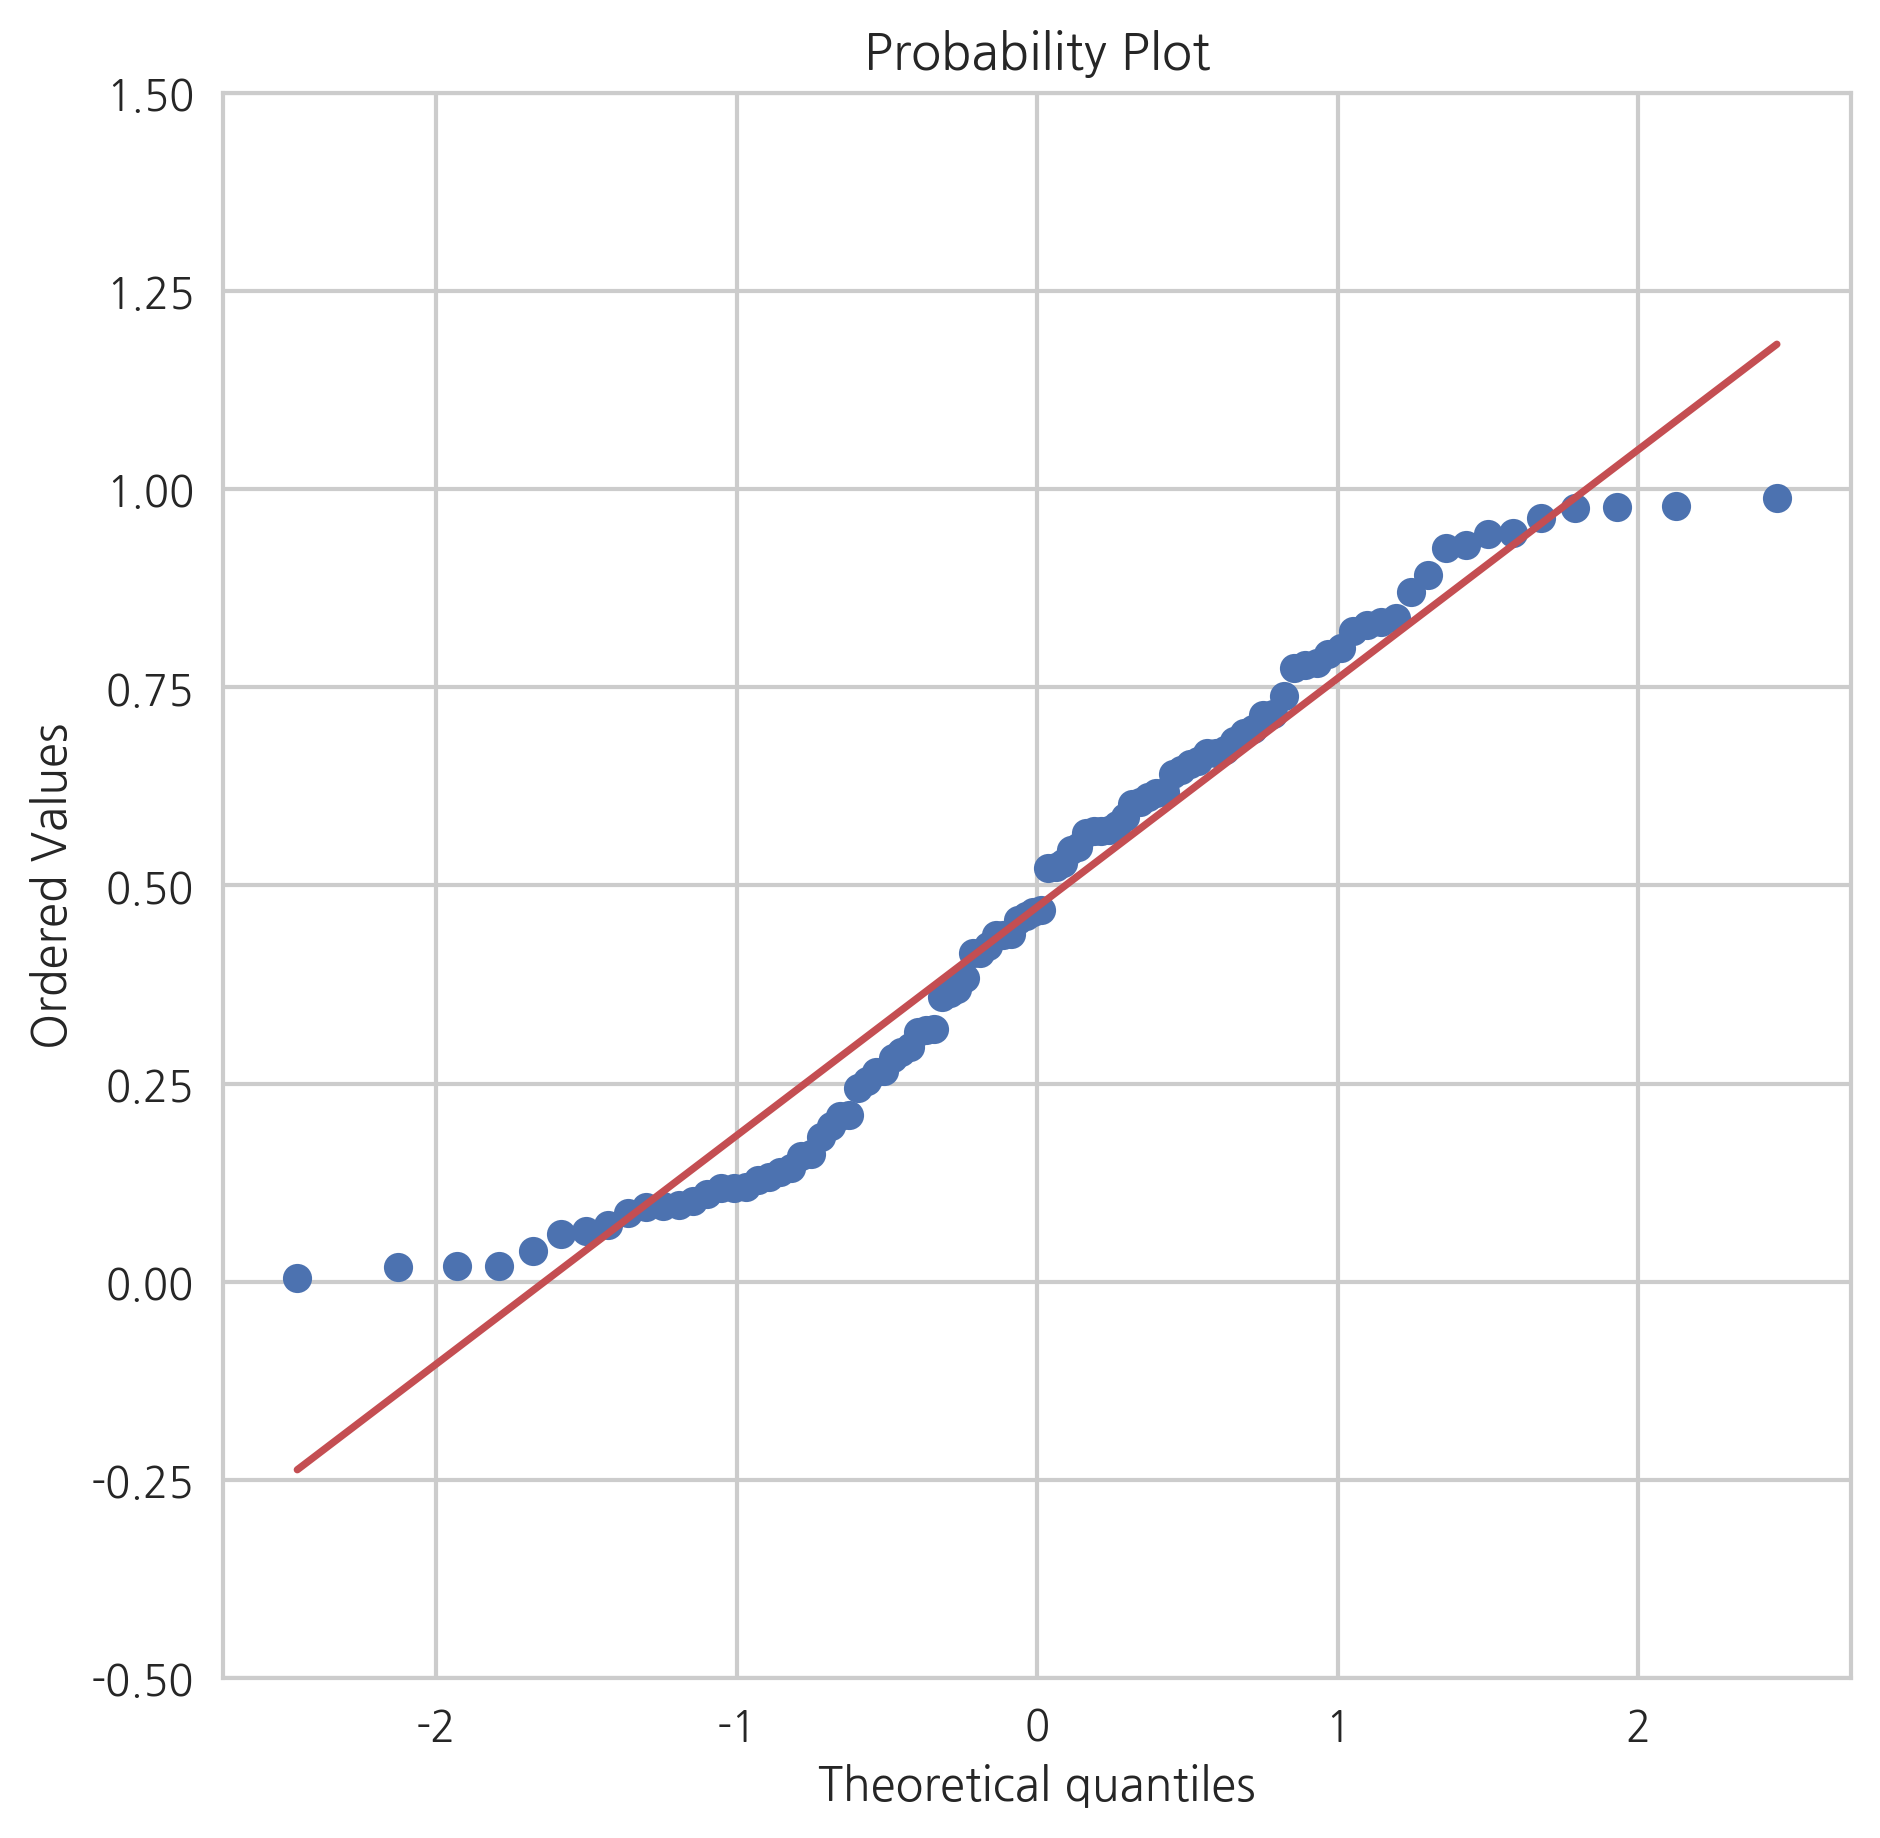

In [7]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

## 중심 극한 정리

실세계에서 발생하는 현상 중 많은 것들이 정규 분포로 모형화 가능하다. 그 이유 중의 하나는 다음과 같은 **중심 극한 정리(Central Limit Theorem)**이다. 중심 극한 정리는 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상을 말한다.
중심 극한 정리를 수학적인 용어로 쓰면 다음과 같다.

$X_1, X_2, \ldots, X_n$가 기댓값이 $\mu$이고 분산이 $\sigma^2$으로 동일한 분포(기댓값과 분산의 값이 동일할 뿐이며 분포의 모양은 달라도 된다)이며 서로 독립인 확률 변수들이라고 하자. 분포가 어떤 분포인지는 상관없다.
$X_1, X_2, \ldots, X_n$에서 뽑은 각각의 샘플 데이터 $x_1, x_2, \ldots, x_n$의 샘플 평균

$$ \bar{x}_n = \dfrac{1}{N}(x_1+\cdots+x_n) $$ 

도 마찬가지로 예측할 수 없는 확률 변수이다. 이 확률 변수를 $\bar{X}_n$이라고 하자.

이 샘플 평균의 평균이 0, 분산이 1이 되도록 다음처럼 정규화를 한다.

$$ \dfrac{\bar{x}_n - \mu}{\dfrac{\sigma}{\sqrt{n}}} $$

중심 극한 정리에 따르면 **정규화된 샘플 평균의 분포는 $n$이 증가할 수록 표준 정규 분포에 수렴**한다. 

$$ \dfrac{\bar{X}_n - \mu}{\dfrac{\sigma}{\sqrt{n}}} \xrightarrow{d}\ \mathcal{N}(x;0,1) $$

$\xrightarrow{d}$ 기호는 분포의 모양이 특정한 분포에 수렴한다는 것을 뜻한다.

시뮬레이션을 사용하여 중심 극한 정리가 성립하는지 살펴보도록 하자. 다음 시뮬레이션에서는 -0.5부터 0.5까지의 균일 분포의 샘플을 각각 1번, 2번, 10번 생성하여 그 합의 분포를 보았다.

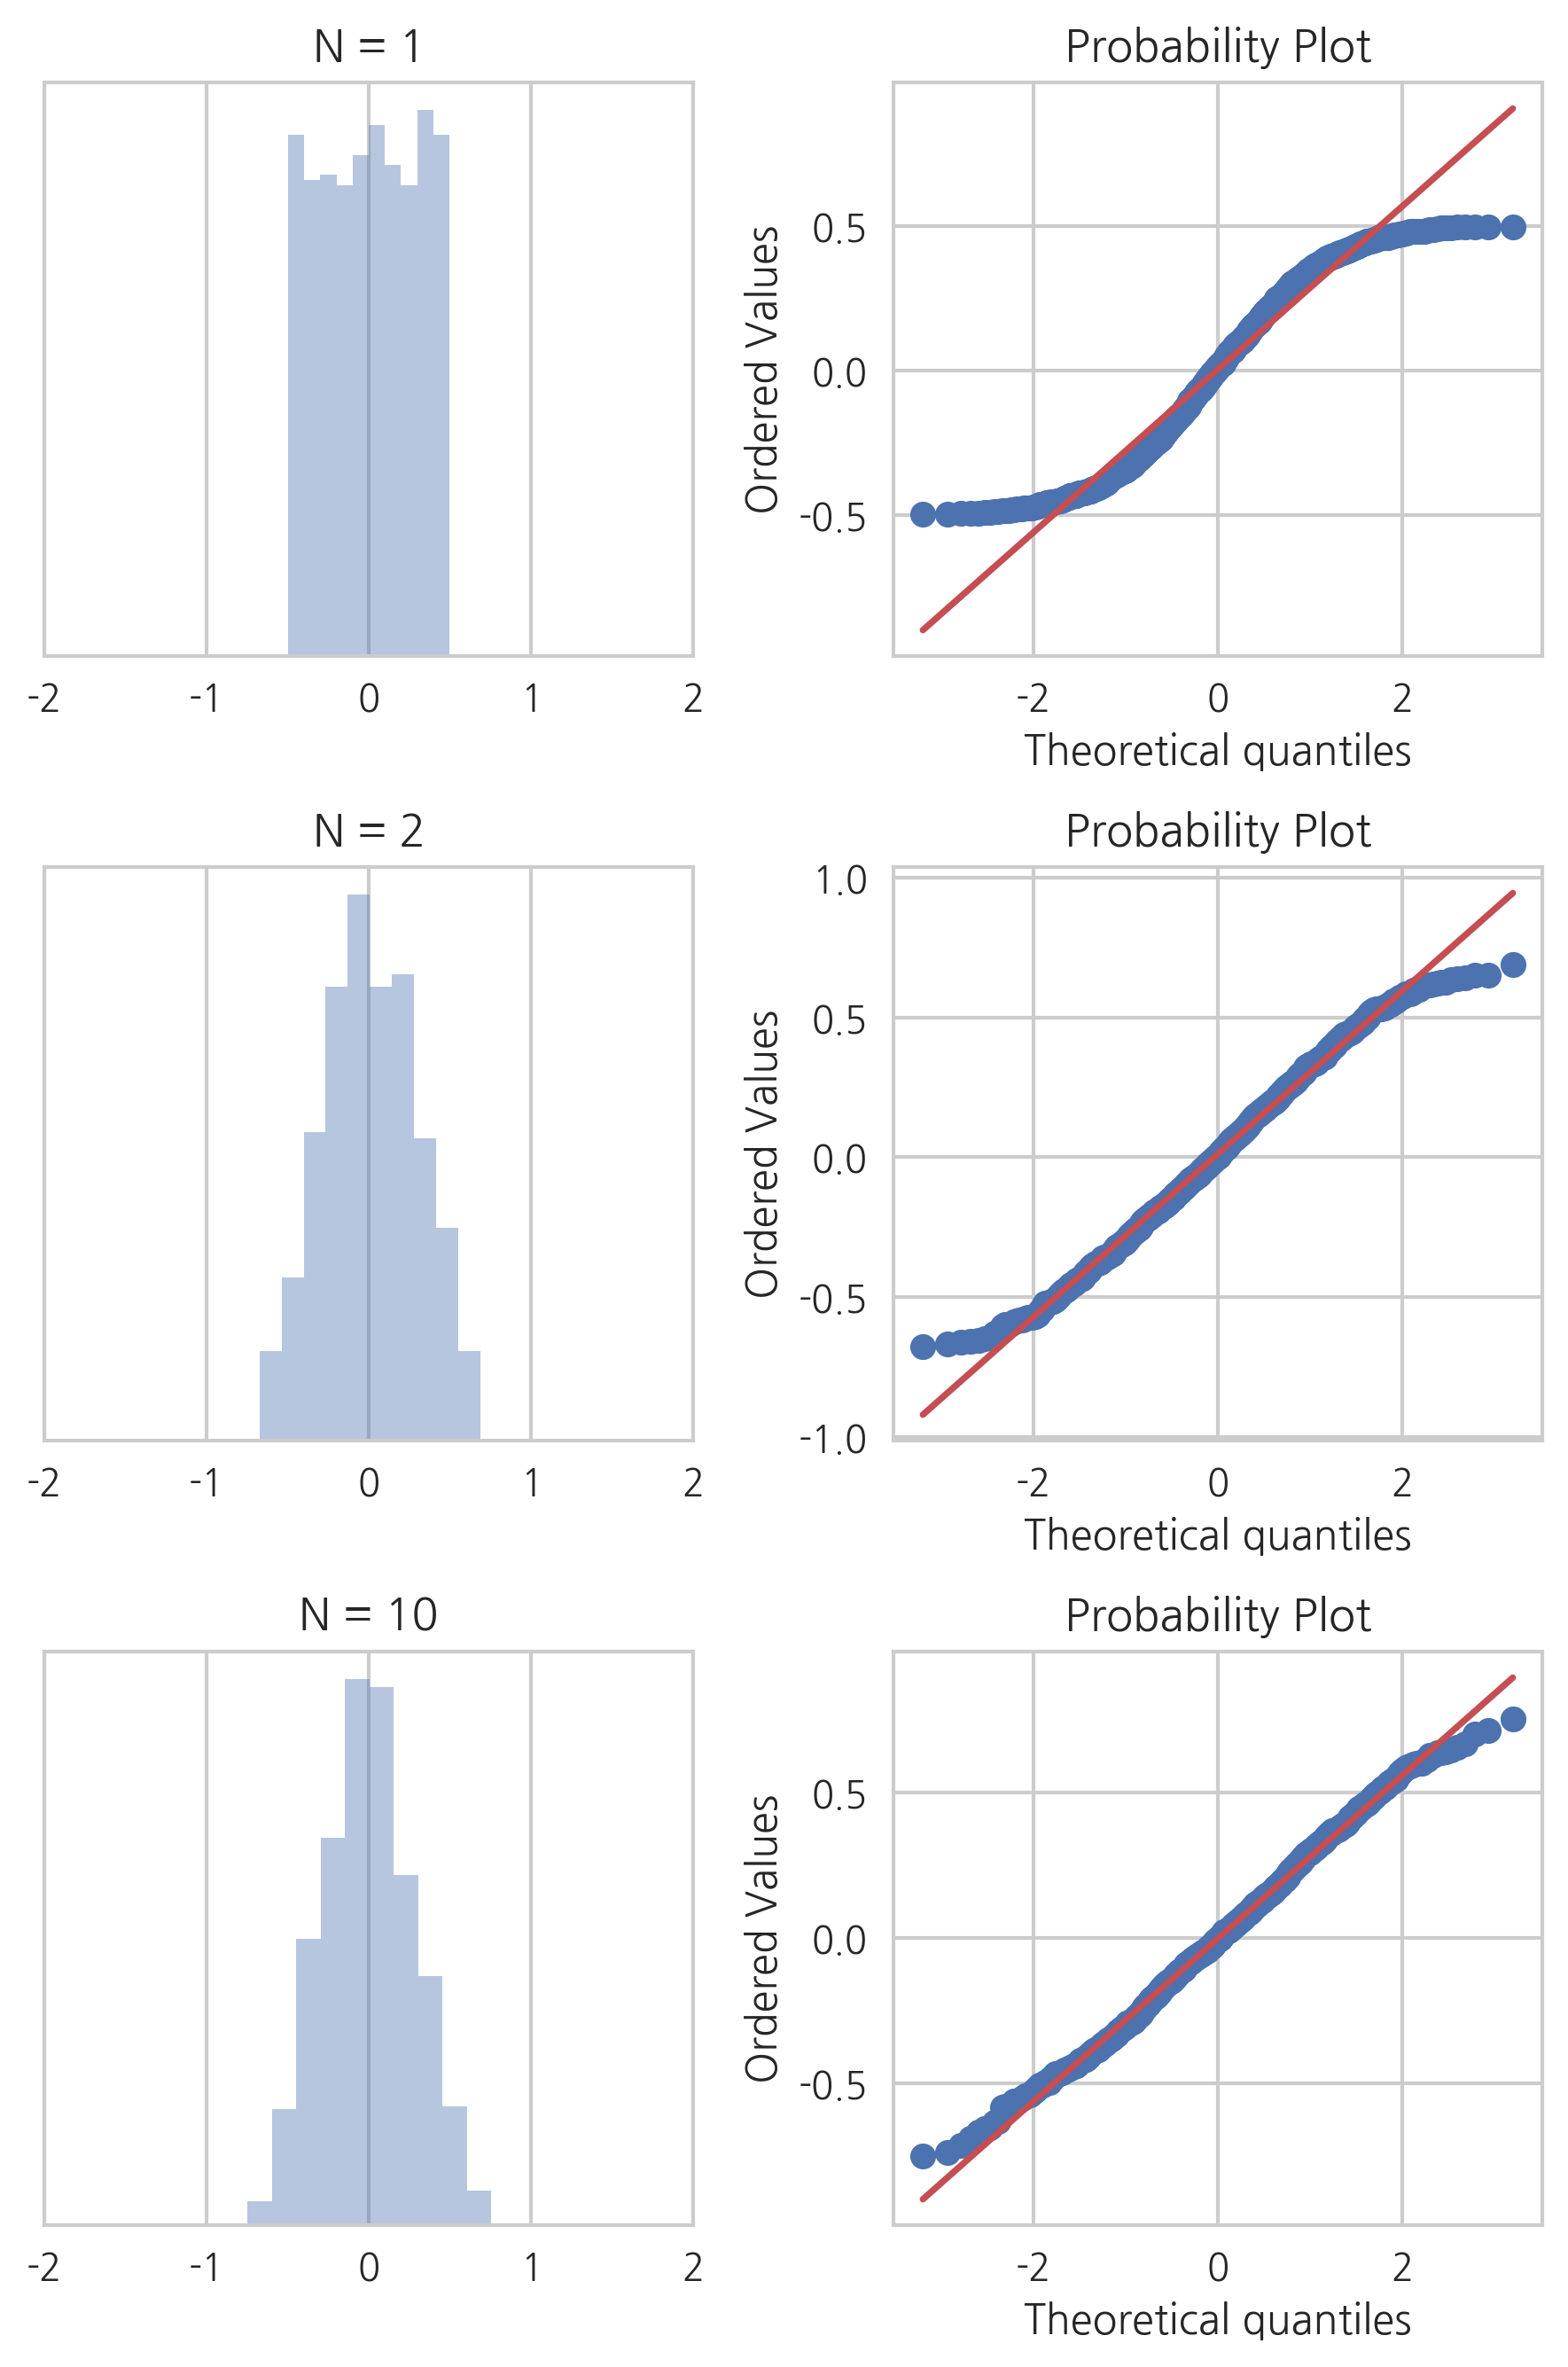

In [11]:
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(1000, N)
    S = (X.sum(axis=1) - 0.5 * N) / np.sqrt(N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(S, bins=10, kde=False, norm_hist=True)
    plt.xlim(-2, 2)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(S, plot=plt)

plt.tight_layout()
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규 분포에 상당히 가까워짐을 볼 수 있다.